<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 &ndash; Drug Discovery</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Schimunek, J. Brandstetter, E.Kobler<br>
<b>Date:</b> 04-04-2022

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Table of contents</h2>
<ol>
    <a href="#molecule-data-nutshell"><li style="font-size:large;font-weight:bold">Molecule Data in a Nutshell</li></a>
    <ol style="margin-bottom:15px">
        <a href="#molecule-data-nutshell-mol-sdf"><li style="font-size:medium">MOL/SDF</li></a>
        <a href="#molecule-data-nutshell-smiles"><li style="font-size:medium">SMILES</li></a>
        <a href="#tasks-one"><li style="font-size:medium">Tasks</li></a>
    </ol>
    <a href="#molecule-data-extraction"><li style="font-size:large;font-weight:bold">Extracting Information of MOL/SDF Representations</li></a>
    <ol style="margin-bottom:15px">
        <a href="#molecule-data-extraction-selection"><li style="font-size:medium">Selecting molecules</li></a>
        <a href="#molecule-data-extraction-atom-numbers"><li style="font-size:medium">Inspecting atom numbers</li></a>
        <a href="#molecule-data-extraction-properties"><li style="font-size:medium">Extracting properties</li></a>
        <a href="#tasks-two"><li style="font-size:medium">Tasks</li></a>
    </ol>
    <a href="#molecule-data-translating"><li style="font-size:large;font-weight:bold">Translating between both Data Formats</li></a>
    <ol style="margin-bottom:15px">
        <a href="#molecule-data-translating-mol-sdf"><li style="font-size:medium">MOL/SDF to SMILES</li></a>
        <a href="#molecule-data-translating-smiles"><li style="font-size:medium">SMILES to MOL/SDF</li></a>
        <a href="#tasks-three"><li style="font-size:medium">Tasks</li></a>
    </ol>
    <a href="#molecule-data-atoms-bonds"><li style="font-size:large;font-weight:bold">Atomic Properties and Bonds</li></a>
    <ol style="margin-bottom:15px">
        <a href="#molecule-data-atoms-bonds-properties-atoms"><li style="font-size:medium">Extracting atomic properties</li></a>
        <a href="#molecule-data-atoms-bonds-properties-bonds"><li style="font-size:medium">Extracting bond properties</li></a>
        <a href="#tasks-four"><li style="font-size:medium">Tasks</li></a>
    </ol>
    <a href="#molecule-data-applications"><li style="font-size:large;font-weight:bold">Further Applications</li></a>
    <ol style="margin-bottom:15px">
        <a href="#molecule-data-applications-substructure"><li style="font-size:medium">Molecular substructure matching</li></a>
        <a href="#molecule-data-applications-fingerprints"><li style="font-size:medium">Molecular fingerprints</li></a>
        <a href="#molecule-data-applications-clustering"><li style="font-size:medium">Molecular clustering</li></a>
        <a href="#tasks-five"><li style="font-size:medium">Tasks</li></a>
    </ol>
</ol>

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>
This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which might require small code modifications. Most/All of the used functions are imported from the file <code>u3_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u3_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u3_utils as u3

# Import additional utilities needed in this notebook.
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from rdkit import Chem

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u3.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>
As mentioned in the introductiory slides, specific minimum versions of Python itself as well as of used modules is recommended.

In [2]:
u3.check_module_versions()

Installed Python version: 3.10 (✓)
Installed numpy version: 1.22.3 (✓)
Installed pandas version: 1.4.2 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.1 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed PIL version: 9.1.0 (✓)
Installed rdkit version: 2022.03.2 (✓)


<a name="molecule-data-nutshell"></a><h2>Molecule Data in a Nutshell</h2>
<p>Molecule data comes in a many shapes, hence manually parsing each data format separately would be <i>very</i> tedious work. Fortunately, <tt>RDKit</tt> helps a lot with handling molecule data and is available as a Python module. It is one of the most prominent open source tools in the domain of <i>chemoinformatics</i>, hence there are many users working with it. This in turn leads to lot of expertise and documentation in the community, so if you are getting stuck with <tt>RDKit</tt>, chances are high that you'll find helpful information in diverse forums or the <a href="https://www.rdkit.org/docs/api-docs.html">official documentation</a>.</p>
<p>As already mentioned, there are many different molecule data formats. The most common ones are:
<ul>
    <li>MOL/SDF</li>
    <li>SMILES</li>
</ul>
In this unit, we will focus on these two data formats.</p>

<a name="molecule-data-nutshell-mol-sdf"></a><h3 style="color:rgb(0,120,170)">MOL/SDF</h3>
<table>
    <tr>
        <td>
            <img src="resources/mol_file.png" alt="Image not found!" width="500px"/>
        </td>
        <td>
            <table style="text-align:center">
                <tr>
                    <th width="100px">Line(s)</th>
                    <th width="400px">Description</th>
                </tr>
                <tr>
                    <td>1 to 3</td>
                    <td>MOL/SDF header information.</td>
                </tr>
                <tr>
                    <td>4</td>
                    <td>Amount of atoms, amount of bonds, ...</td>
                </tr>
                <tr>
                    <td>5 to 21</td>
                    <td>Atom block: x-, y- and z-coordinates, atom type, ...</td>
                </tr>
                <tr>
                    <td>22 to 40</td>
                    <td>Bond block: <i>first</i> atom, <i>second</i> atom, bond type, ...</td>
                </tr>
                <tr>
                    <td>42 to (end - 1)</td>
                    <td>Various molecule properties.</td>
                </tr>
                <tr>
                    <td>end</td>
                    <td>The end of a MOL/SDF is signaled by <i>four</i> &#36;.</td>
                </tr>
            </table>
        </td>
    </tr>
</table>

Full file format description: http://c4.cabrillo.edu/404/ctfile.pdf (chapter 2)

<a name="molecule-data-nutshell-smiles"></a><h3 style="color:rgb(0,120,170)">SMILES</h3>
<p>The name of this data format is an abbreviation for <i><b>S</b>implified <b>M</b>olecular <b>I</b>nput <b>L</b>ine <b>E</b>ntry <b>S</b>pecification</i>. Molecules are herein represented as sequences of special tokens, denoting the <i>atoms</i> as well as additional properties like the <i>bond</i>. <i>Rings</i> in the molecular structure are denoted by corresponding numbers, whereas <i>side chains</i> are denoted by brackets. One very important thing about SMILES representations is their <i>non-uniqueness</i>. Hence, a <i>single</i> molecule may have <i>multiple</i> SMILES representations.

<center>
    <img src="resources/smiles.png" alt="Image not found!"/>
</center>
    
This sketch demonstrates the extraction of one SMILES representation (<tt>D</tt>) of a specific molecule (<tt>A</tt>).</p>

<a name="tasks-one"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Get a little bit more familier with the <i>MOL/SDF</i> format. Do you already see the corresponding atoms?</li>
            <li>Get a little bit more familier with the <i>SMILES</i> format. Can you see, why such a representation may <i>not</i> be unique?</li>
        </ul>
</div>

<a name="molecule-data-extraction"></a><h2>Extracting Information of MOL/SDF Representations</h2>
<p>The first step of working with molecule data is actually getting them into memory. <tt>RDKit</tt> provides this functionality with <code>SDMolSupplier</code> – be aware that the specified file is <i>not</i> loaded at once, but piece by piece, depending on what information is retrieved. This behavior is solely for performance reasons, hence you do not need to worry about this besides <i>not</i> deleting/moving the specified data file during the whole process.</p>

In [3]:
data_molecules = Chem.SDMolSupplier('resources/molecules.sdf')

In [4]:
num_molecules = len(data_molecules)
print(f'{num_molecules} molecules loaded from file.')

218 molecules loaded from file.


<a name="molecule-data-extraction-selection"></a><h3 style="color:rgb(0,120,170)">Selecting molecules</h3>
<p>Specific molecules can be simply selected using the well-known Python indexing mechanics – with the exception that only <i>single</i> integer indices are allowed (e.g., no <i>slices</i>). <code>MolToImage</code> allows to plot a specified molecule in a simple way, including coloring of specific sub-structures for easier recognition.</p>

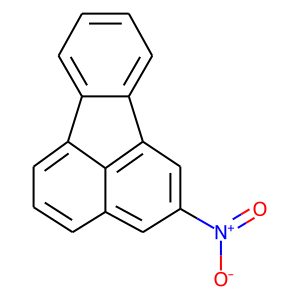

In [5]:
specific_molecule = data_molecules[41]
Chem.Draw.MolToImage(specific_molecule)

<p>If more detailed information about the molecular structure of a specified molecule is needed, the corresponding <code>MolToMolBlock</code> call delivers exactly that. The resulting ouput should already look quite familiar, if not, have a look at the section <a href="#molecule-data-nutshell-mol-sdf">MOL/SDF</a> of this notebook once again.</p>

In [6]:
specific_molecule_mol_block = Chem.MolToMolBlock(specific_molecule)
print(specific_molecule_mol_block)

2-nitrofluoranthene
     RDKit          2D

 19 22  0  0  0  0  0  0  0  0999 V2000
    2.8772    8.0184    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4622    8.0184    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7547    6.7449    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4622    5.5185    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8772    5.5185    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5847    6.7449    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0377    4.1507    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1697    3.3489    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3017    4.1507    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000    3.3960    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000    2.1697    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1792    1.4150    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1697    2.0282    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.

<p>Extracting SMILES representations from specified molecules is quite easy with <code>MolToSmiles</code>.</p>

In [7]:
specific_molecule_smiles = Chem.MolToSmiles(specific_molecule)
print(specific_molecule_smiles)

O=[N+]([O-])c1cc2c3c(cccc3c1)-c1ccccc1-2


<a name="molecule-data-extraction-atom-numbers"></a><h3 style="color:rgb(0,120,170)">Inspecting atom numbers</h3>
<p>One often needed information is the <i>atom number</i> of each atom in a given molecule. As <tt>RDKit</tt> changed this specific functionality a little bit in the current versions, we are unceremoniously implementing it on our own (see <code>annotate_molecule_atoms</code>). The visualization procedure stays the same as shown previously, so nothing needs to be adapted here.</p>

In [8]:
def annotate_molecule_atoms(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with corresponding atom numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for atom in molecule_annotated.GetAtoms():
        atom.SetProp('atomNote', str(atom.GetIdx()))
    return molecule_annotated

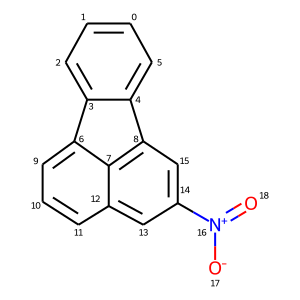

In [9]:
specific_molecule_annotated = annotate_molecule_atoms(specific_molecule)
Chem.Draw.MolToImage(specific_molecule_annotated)

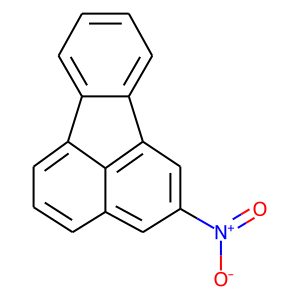

In [10]:
Chem.Draw.MolToImage(specific_molecule)

<a name="molecule-data-extraction-properties"></a><h3 style="color:rgb(0,120,170)">Extracting properties</h3>
<p>Every molecule may be annotated by various properties. Examples comprise:
<ul>
    <li>Compound Name</li>
    <li>Formula</li>
</ul>

A list of all property names of a molecule can be extracted by <code>GetPropNames</code>, whereas a specific property value by <code>GetProp</code> and the corresponding <i>property name</i>. This in combination with the previously discussed plotting functionality acts as an easy but effective mechanism to get a quick overview of the molecules at hand.</p>

In [11]:
list(specific_molecule.GetPropNames())

['Compound Name', 'Formula', 'LogP', 'LUMO', 'MOL_ID', 'Activity']

In [12]:
print(f'The molecule "{specific_molecule.GetProp("Compound Name")}" '
      f'with the formula "{specific_molecule.GetProp("Formula")}" '
      f'has an activity of "{specific_molecule.GetProp("Activity")}".')

The molecule "2-nitrofluoranthene" with the formula "C16H9NO2" has an activity of "3.01".


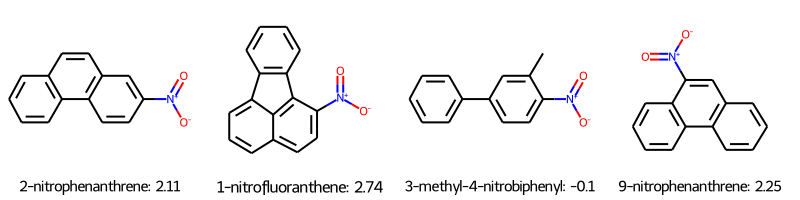

In [13]:
# Select specific molecules and extract some of their properties.
specific_molecules = [data_molecules[i] for i in (0, 3, 6, 9)]
specific_molecule_labels = [f'{mol.GetProp("Compound Name")}: {mol.GetProp("Activity")}' for mol in specific_molecules]

# Plot specified molecules with extracted properties as labels in a grid plot.
Chem.Draw.MolsToGridImage(
    specific_molecules,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

<a name="tasks-two"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Select different molecules (e.g., the $15^{th}$ as well as the $23^{rd}$) and plot them. Which substructures do you observe?</li>
            <li>Print the corresponding <i>molecule blocks</i> and compare them with the previously plotted molecules. Do you see the connections?</li>
            <li>Annotate and visualize the molecule with <i>atom numbers</i> as well as compute their respective <i>SMILES</i> representations. Is the previous comparison now easier?</li>
            <li>Extract various properties of the selected molecules and plot them together in a <i>grid image</i>. Sort them according to their <i>activity</i>.</li>
        </ul>
</div>

<a name="molecule-data-translating"></a><h2>Translating between both Data Formats</h2>
<p>Both presented data formats <i>MOL/SDF</i> as well as <i>SMILES</i> serve different purposes. Depending on the situation, one might be preferred over the other. Fortunately, converting them between each other is pretty simple.
<ul>
    <li><tt>MOL/SDF</tt> to <tt>SMILES</tt>: <code>MolToSmiles</code></li>
    <li><tt>SMILES</tt> to <tt>MOL/SDF</tt>: <code>MolFromSmiles</code></li>
</ul>
This section shortly demonstrates this functionality.</p>

<a name="molecule-data-translating-mol-sdf"></a><h3 style="color:rgb(0,120,170)">MOL/SDF to SMILES</h3>

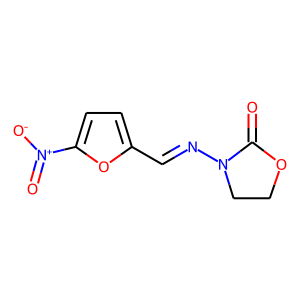

In [14]:
specific_molecule = data_molecules[-1]
Chem.Draw.MolToImage(specific_molecule)

In [15]:
specific_molecule_smiles = Chem.MolToSmiles(specific_molecule)
print(specific_molecule_smiles)

O=C1OCCN1/N=C/c1ccc([N+](=O)[O-])o1


<a name="molecule-data-translating-smiles"></a><h3 style="color:rgb(0,120,170)">SMILES to MOL/SDF</h3>

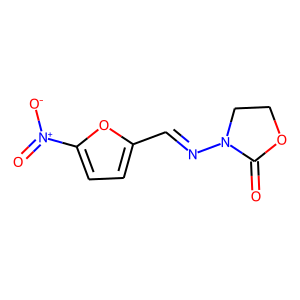

In [16]:
specific_molecule_from_smiles = Chem.MolFromSmiles(r'O=C1OCCN1/N=C/c1ccc([N+](=O)[O-])o1')
Chem.Draw.MolToImage(specific_molecule_from_smiles)

<p><i>Hydrogen</i> atoms are not explicitly defined in a SMILES representation, but they are nonetheless implied – as you can see in the following. The amount of hydrogen atoms depends, among other things, on the center atom (as you most probably already know from a chemistry class). If you want to visualize the hydrogens nonetheless, this can be achiebved by <code>AddHs</code>.</p>

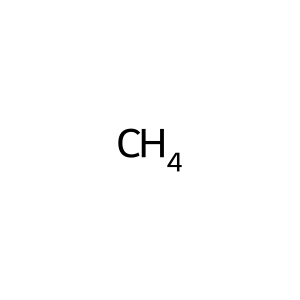

In [17]:
specific_molecule_methane = Chem.MolFromSmiles('C')
Chem.Draw.MolToImage(specific_molecule_methane)

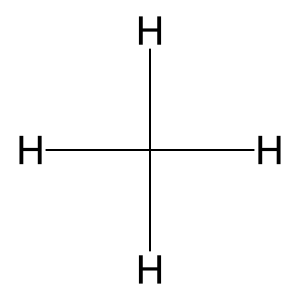

In [18]:
specific_molecule_methane_full = Chem.AddHs(specific_molecule_methane)
Chem.Draw.MolToImage(specific_molecule_methane_full)

<a name="tasks-three"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Experiment with different <i>SMILES</i> representations by converting them to <i>MOL/SDF</i>. Visualize the resulting molecules.</li>
            <li>Convert the resulting <i>MOL/SDF</i> back to <i>SMILES</i>. Do you see a difference between <i>lower</i> and <i>upper</i> case letters?</li>
            <li>Plot the molecule <tt>H<sub>2</sub>O</tt> <i>including</i> the hydrogen atoms (annotate the molecule with the corresponding <i>atom numbers</i>).</li>
        </ul>
</div>

<a name="molecule-data-atoms-bonds"></a><h2>Atomic Properties and Bonds</h2>
<p>Extracting <i>atomic</i> as well as <i>bond</i> properties often allows for a more thorough undertstanding of the molecules at hand. Unsurprisingly, <tt>RDKit</tt> provides the necessary functionality for this purpose – almost. But at first, let's draw once again a sample molecule to analyze in this section.</p>

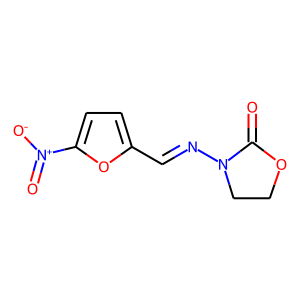

In [19]:
specific_molecule = data_molecules[-1]
Chem.Draw.MolToImage(specific_molecule)

In [20]:
num_atoms = specific_molecule.GetNumAtoms()
print(f'The molecule "{specific_molecule.GetProp("Compound Name")}" comprises {num_atoms} atoms.')

The molecule "furazolidone" comprises 16 atoms.


<a name="molecule-data-atoms-bonds-properties-atoms"></a><h3 style="color:rgb(0,120,170)">Extracting atomic properties</h3>

<p>Especially for chemists (this includes of course <i>chemoinformaticians</i>), properties like
<ul>
    <li>atomic number (<code>GetAtomicNum</code>)</li>
    <li>participation in a ring structure (<code>IsInRing</code>)</li>
</ul>
are quite interesting to know, especially if an atom is part of a ring structure, or not.</p>

In [21]:
for atom in specific_molecule.GetAtoms():
    print(f'Atom No. {atom.GetIdx():>2} with an atomic number of "{atom.GetAtomicNum()}".')

Atom No.  0 with an atomic number of "6".
Atom No.  1 with an atomic number of "6".
Atom No.  2 with an atomic number of "6".
Atom No.  3 with an atomic number of "8".
Atom No.  4 with an atomic number of "6".
Atom No.  5 with an atomic number of "7".
Atom No.  6 with an atomic number of "8".
Atom No.  7 with an atomic number of "8".
Atom No.  8 with an atomic number of "6".
Atom No.  9 with an atomic number of "7".
Atom No. 10 with an atomic number of "7".
Atom No. 11 with an atomic number of "6".
Atom No. 12 with an atomic number of "6".
Atom No. 13 with an atomic number of "8".
Atom No. 14 with an atomic number of "6".
Atom No. 15 with an atomic number of "8".


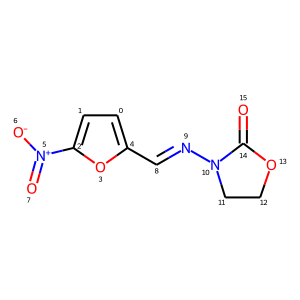

In [22]:
specific_molecule_annotated = annotate_molecule_atoms(specific_molecule)
Chem.Draw.MolToImage(specific_molecule_annotated)

In [23]:
for atom in specific_molecule.GetAtoms():
    print(f'Atom No. {atom.GetIdx():>2} is {"" if atom.IsInRing() else "not ":>4}in a ring.')

Atom No.  0 is     in a ring.
Atom No.  1 is     in a ring.
Atom No.  2 is     in a ring.
Atom No.  3 is     in a ring.
Atom No.  4 is     in a ring.
Atom No.  5 is not in a ring.
Atom No.  6 is not in a ring.
Atom No.  7 is not in a ring.
Atom No.  8 is not in a ring.
Atom No.  9 is not in a ring.
Atom No. 10 is     in a ring.
Atom No. 11 is     in a ring.
Atom No. 12 is     in a ring.
Atom No. 13 is     in a ring.
Atom No. 14 is     in a ring.
Atom No. 15 is not in a ring.


<a name="molecule-data-atoms-bonds-properties-bonds"></a><h3 style="color:rgb(0,120,170)">Extracting bond properties</h3>
<p>An often needed information is the <i>bond number</i> of each bond between atoms in a given molecule. Especially for visualization purposes, if one, e.g., wants to connect bond specific properties to the appropriate bonds, this turns out as quite useful. As <tt>RDKit</tt> changed this specific functionality a little bit in the current versions (if it was <i>ever</i> publicly present), we are unceremoniously implementing it on our own (see <code>annotate_molecule_bonds</code>). The visualization procedure stays the same as shown previously, so nothing needs to be adapted here.</p>

In [24]:
def annotate_molecule_bonds(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule bonds with corresponding bond numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for bond in molecule_annotated.GetBonds():
        bond.SetProp('bondNote', str(bond.GetIdx()))
    return molecule_annotated

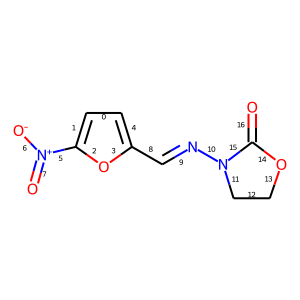

In [25]:
specific_molecule_annotated = annotate_molecule_bonds(specific_molecule)
Chem.Draw.MolToImage(specific_molecule_annotated)

In [26]:
specific_molecule.GetBondWithIdx(16).GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [27]:
for bond in specific_molecule.GetBonds():
    print(f'Bond No. {bond.GetIdx():>2} with a bond type of "{str(bond.GetBondType()):^8}".')

Bond No.  0 with a bond type of "AROMATIC".
Bond No.  1 with a bond type of "AROMATIC".
Bond No.  2 with a bond type of "AROMATIC".
Bond No.  3 with a bond type of "AROMATIC".
Bond No.  4 with a bond type of "AROMATIC".
Bond No.  5 with a bond type of " SINGLE ".
Bond No.  6 with a bond type of " SINGLE ".
Bond No.  7 with a bond type of " DOUBLE ".
Bond No.  8 with a bond type of " SINGLE ".
Bond No.  9 with a bond type of " DOUBLE ".
Bond No. 10 with a bond type of " SINGLE ".
Bond No. 11 with a bond type of " SINGLE ".
Bond No. 12 with a bond type of " SINGLE ".
Bond No. 13 with a bond type of " SINGLE ".
Bond No. 14 with a bond type of " SINGLE ".
Bond No. 15 with a bond type of " SINGLE ".
Bond No. 16 with a bond type of " DOUBLE ".


<a name="tasks-four"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Select different molecules (e.g., the $15^{th}$ as well as the $23^{rd}$) and compute their <i>atom counts</i>. Print them together with their <i>name</i>.</li>
            <li>For each atom, compute the corresponding <i>atomic numbers</i> as well as their <i>ring participation</i>. How many atoms are in a <i>single</i> ring?</li>
            <li>Annotate the <i>bonds</i> of the chosen molecules and plot the result. How many bonds do you observe?</li>
            <li>Compute the <i>type</i> of each <i>bond</i> and try to find them in the previously annotated plot. Can you recognize them?</li>
        </ul>
</div>

<a name="molecule-data-applications"></a><h2>Further Applications</h2>
<p>Up until now, all necessary information for more advanced applications were presented and discussed. But at some point, one might want to dig into the more interesting applications of chemoinformatics, like:
<ul>
    <li>molecular substructure matching</li>
    <li>molecular fingerprints</li>
    <li>molecular clustering</li>
</ul>Although each of these applications might fill multiple classes on their own, we will nonetheless briefly demonstrate and discuss each of them.</p>

<a name="molecule-data-applications-substructure"></a><h3 style="color:rgb(0,120,170)">Molecular substructure matching</h3>
<p>Given a template and a set of molecules, <i>substructure matching</i> is a very useful tool to filter molecules according to specific substructures – this is especially interesting, as substructures are often responsible for various molecular properties which in turn may define how a molecule behaves in specific situations.</p>

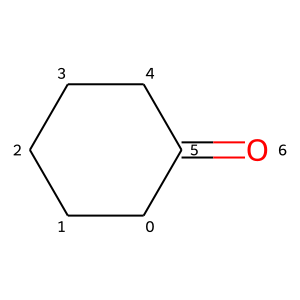

In [28]:
specific_molecule = Chem.MolFromSmiles('C1CCCCC1(=O)')
Chem.Draw.MolToImage(annotate_molecule_atoms(specific_molecule))

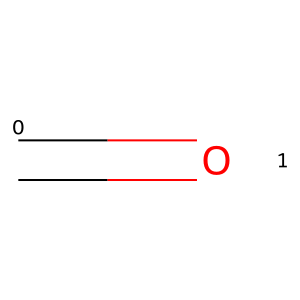

In [29]:
specific_pattern = Chem.MolFromSmiles('C=O')
Chem.Draw.MolToImage(annotate_molecule_atoms(specific_pattern))

In [30]:
has_substructure_match = specific_molecule.HasSubstructMatch(specific_pattern)
print(f'Substructure match at "{specific_molecule.GetSubstructMatch(specific_pattern)}".' if has_substructure_match else 'No substructure match found!')

Substructure match at "(5, 6)".


<a name="molecule-data-applications-fingerprints"></a><h3 style="color:rgb(0,120,170)">Molecular fingerprints</h3>
<p>If you want to apply clustering methods or neural networks to molecule data, it often will be a good idea to extract some features beforehand. Many algorithms do not perform well on molecules in SMILES notation since the corresponding information is merely specified as <i>strings</i>. The so-called <i>Extended Connectivity Fingerprints (ECFPs)</i> extract subpatterns from the molecule and store them as numeric identifiers. Later on, each molecule is tested on every substructure found in the data, leading to a representation better suited for further processing.</p>

In [31]:
# First, all molecules need to be converted to corresponding SMILES representations.
data_molecules_smiles = [Chem.MolToSmiles(molecule) for molecule in data_molecules]

# Afterwards, ECFPs are computed and visualized in tabular form.
data_molecules_ecfps = u3.compute_ecfps(data_molecules_smiles, fold=1024)
data_molecules_ecfps

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
216,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<p>The previous table comprises $218$ rows (the length of the molecules data set) as well as $1024$ columns (the chosen fold size). Each <i>row</i> corresponds to the <i>ECFP</i> of the respective molecule, whereas each <i>column</i> to a specific <i>substructure group</i> with:
<table style="text-align:center">
    <tr>
        <th>Value</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>False</code></td>
        <td>Corresponding substructure(s) was <i>not</i> found in the molecule.</td>
    </tr>
    <tr>
        <td><code>True</code></td>
        <td>Corresponding substructure(s) <i>was</i> found in the molecule.</td>
    </tr>
</table>
For a better overview, it is additionally a good idea to compute the total amount of found substructure groups for each molecule.</p>

In [32]:
pd.DataFrame(data_molecules_ecfps.sum(axis=1)).transpose()

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,40,34,36,44,27,24,36,49,41,34,...,32,58,50,40,26,33,40,46,41,46


<a name="molecule-data-applications-clustering"></a><h3 style="color:rgb(0,120,170)">Molecular clustering</h3>
<p>Visualizing the ECFPs in tabular form might give a coarse overview of the molecules at hand, but it is not really exciting – in marked contrast to <i>clustering</i> them, as well as inspecting the resulting clusters for similarities. Before a corresponding cluster method is applied, we want to downproject the data set first. Two prominent techniques are (they were presented in previous classes, but will nonetheless pop up more often):
<ul>
    <li>Principal Component Analysis (PCA)</li>
    <li>t-distributed Stochastic Neighbor Embedding (t-SNE)</li>
</ul>
For our visualization purposes, <i>two</i> components are enough.

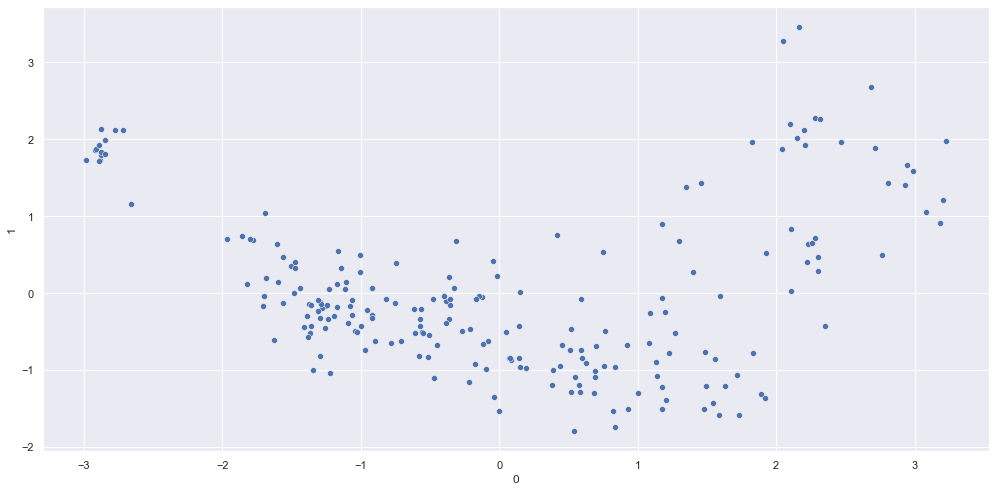

In [33]:
# Compute Principal Component Analysis (PCA) and reduce the dimensionality of the ECFPs.
data_molecules_ecfps_pca = u3.apply_pca(n_components=2, data=data_molecules_ecfps)
u3.plot_points_2d(data=data_molecules_ecfps_pca, figsize=(14, 7))

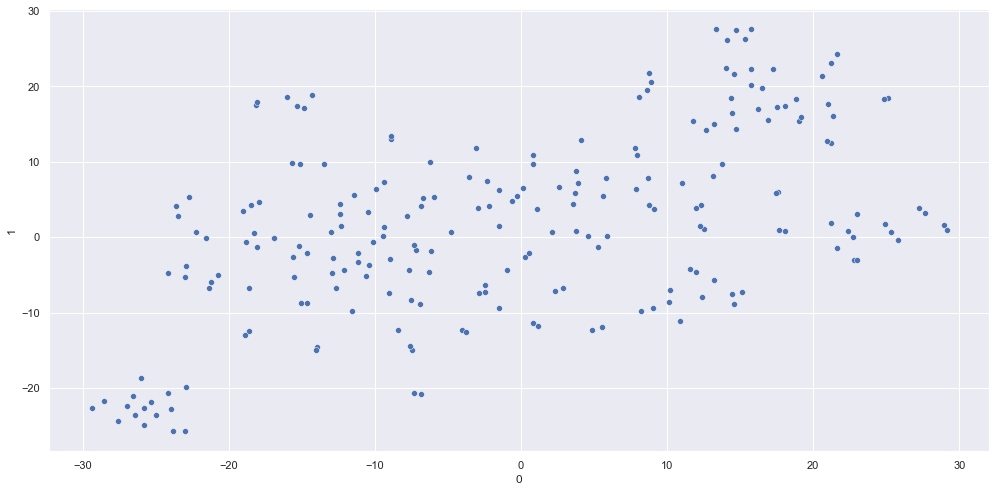

In [34]:
# Set random seed for reproducibility.
np.random.seed(seed=42)

# Compute t-SNE and reduce the dimensionality of the ECFPs.
data_molecules_ecfps_tsne = u3.apply_tsne(n_components=2, data=data_molecules_ecfps, perplexity=15.0)
u3.plot_points_2d(data=data_molecules_ecfps_tsne, figsize=(14, 7))

After the downprojection of the molecule data set, two often used clustering techniques are applied:
<ul>
    <li>k-means</li>
    <li>affinity propagation</li>
</ul>
For a more detailed description on them, please have a look at the previous classes.</p>

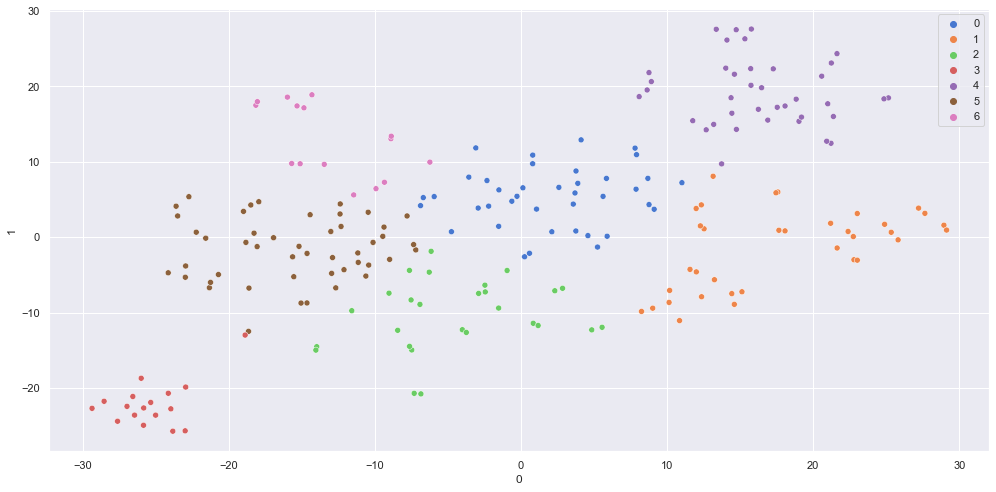

In [35]:
# Set random seed for reproducibility.
np.random.seed(seed=42)

# Compute k-means on the t-SNE downprojected data set.
k_means_clusters_tsne = u3.apply_k_means(k=7, data=data_molecules_ecfps_tsne)
u3.plot_points_2d(data=data_molecules_ecfps_tsne, targets=k_means_clusters_tsne, figsize=(14, 7))

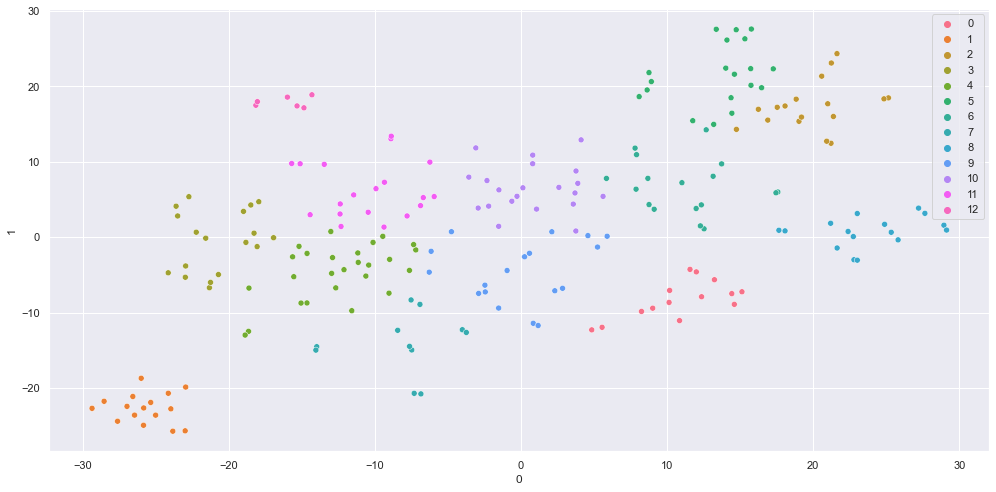

In [36]:
# Compute affinity propagation on the t-SNE downprojected data set.
affinity_propagation_clusters_tsne = u3.apply_affinity_propagation(data=data_molecules_ecfps_tsne)
u3.plot_points_2d(data=data_molecules_ecfps_tsne, targets=affinity_propagation_clusters_tsne, figsize=(14, 7))

<p>Now we can inspect the molecules assigned to the same cluster. Do you see any similarities between them?</p>

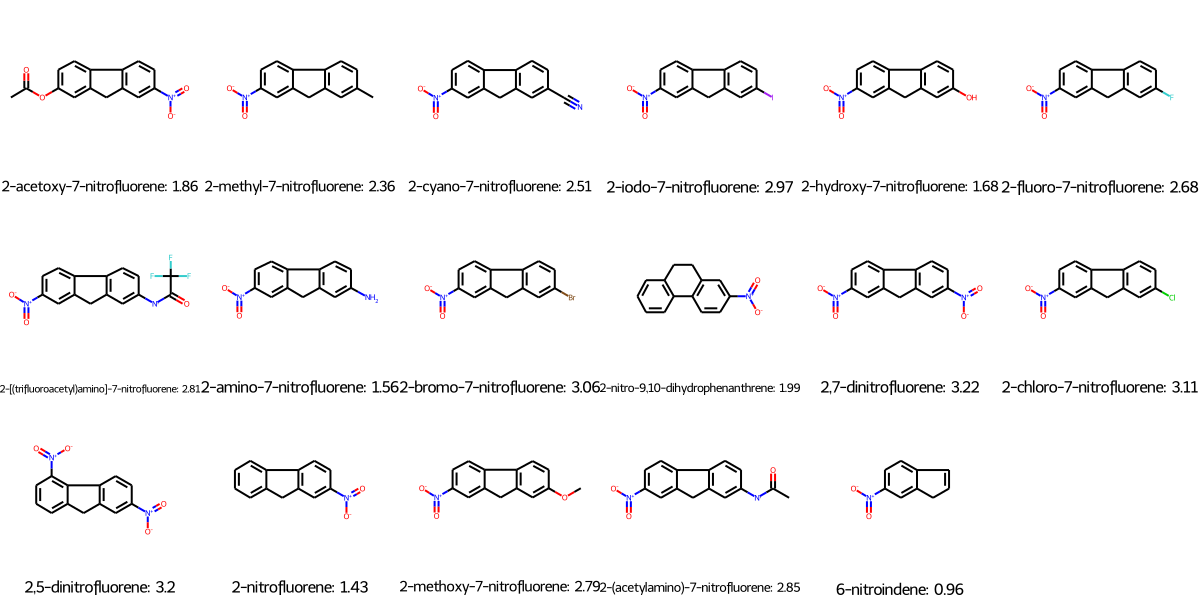

In [37]:
# Select specific molecules (here: based on k-means clustering) and extract some of their properties.
cluster_indices = data_molecules_ecfps_tsne[k_means_clusters_tsne == 3].index
cluster_molecules = [data_molecules[i] for i in cluster_indices]
cluster_molecule_labels = [f'{mol.GetProp("Compound Name")}: {mol.GetProp("Activity")}' for mol in cluster_molecules]

# Plot specified molecules with extracted properties as labels in a grid plot.
Chem.Draw.MolsToGridImage(
    cluster_molecules,
    legends=cluster_molecule_labels,
    maxMols=len(cluster_molecules),
    molsPerRow=6)

<a name="tasks-five"></a><h3 style="color:rgb(0,120,170)">Tasks</h3>
    <div class="alert alert-warning">
        Execute the notebook until here and try to solve the following tasks:
        <ul>
            <li>Specify a <i>flourine</i> (<tt>F</tt>) template and scan the molecules data set. Plot all found molecules in a <i>grid</i>, including their <i>compound name</i>.</li>
            <li>Compute the <i>ECFPs</i> from these molecules and visualize them in tabular form. How many <i>substructures</i> are present in each molecule?</li>
            <li>Downproject these <i>ECFPs</i> using <i>PCA</i> as well as <i>t-SNE</i>. Visualize the results in a <i>scatter plot</i>. Are there any visible clusters?</li>
            <li>Cluster the resulting downprojections using <i>k-means</i> as well as <i>affinity propagation</i>. Experiment with different settings.</li>
            <li>Plot the molecules of one or more of the resulting <i>clusters</i> in a <i>grid</i> including their <i>Compound Name</i> and <i>Activity</i>. Do you see similarities?</li>
        </ul>
</div>